# Figure S5: Trends over each high EKE region

**Revision: 28 November 2024**

**Fig. 5. EKE time series and trends over each high EKE region.** Comparison of the area-weighted mean EKE time series computed over each high EKE region from 1993 to 2022: (A) Great Whirl and Socotra Eddy in East Africa (GWSE), (B) Agulhas Current (AC), (C) Kuroshio Extension (KE), (D) Gulf Stream (GS), (E) Loop Current (LC), (F) Brazil Malvinas Confluence region (BMC) and (G) East Australian Current (EAC). Thinner lines represent the original data, while thicker lines show the smoothed 365-day running average. (H) Trends of the original area-weighted mean EKE time series shown in (A-G). Significant trends (p < 0.05) are written in bold text, while non-significant trends are written in italics. 


### Import libraries

In [1]:
%reload_ext autoreload
%autoreload 2

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.lines as mlines
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import plot_utils
import utils
from matplotlib.patches import Patch
import matplotlib.dates as mdates

### Open files with the time series of each region

In [2]:
kinds = ['ALL_SAT', 'TWO_SAT']

# exclude this data from the datasets to keep only each high EKE region
keys_excluded    = ['no ice', 'high eke', 'tropical', 'remainder']

timeseries = {}
for kind in kinds:
    path_ts = f'../../results/EKE_{kind}/tseries/EKE_{kind}_tseries.nc'
    ds = xr.open_dataset(path_ts)
    timeseries[kind] = ds.drop_vars(keys_excluded)
    

### Regions of study

In [3]:
dic_keys = list(timeseries['ALL_SAT'].data_vars.keys())
dic_keys

['GWSE', 'AC', 'KE', 'GS', 'LC', 'BMC', 'EAC']

## Calculate trends for each EKE time series and save values into a list

In [4]:
# Multply by the factor 365 days to convert trends per day to trends per year 
# units from (cm$^2$ s$^{-2}$ day$^{-1}$) to (cm$^2$ s$^{-2}$ y$^{-1}$)
factor = 365

In [5]:
list_slope_all21raw  = []
list_slope_two21raw  = []

list_pval_all21raw   = []
list_pval_two21raw   = []

list_se_all21raw   = []
list_se_two21raw   = []

list_slope_all21rol  = [] 
list_slope_two21rol  = []

list_pval_all21rol   = []
list_pval_two21rol   = []

list_se_all21rol   = []
list_se_two21rol   = []

In [6]:
    for k in range(len(dic_keys)):
            
            print('')
            print('----------------')
            print(dic_keys[k])
            print('----------------')
            
            # ----- ALL-SAT vDT2021 (CMEMS) -----
            # all-sat raw
            all_ts = timeseries['ALL_SAT'][dic_keys[k]]
            
            # all-sat 365 day rolling mean 
            all_ts_roll = all_ts.rolling(time=365, center=True).mean()
 
            # ----- TWO-SAT vDT2021 (CMEMS) -----
            # two-sat raw
            two_ts = timeseries['TWO_SAT'][dic_keys[k]]
            
            # two-sat 365 day rolling mean 
            two_ts_roll = two_ts.rolling(time=365, center=True).mean()
       
            
            print('computing trends for this period:') # '01-01-1993' - '31-12-2022'
            print('all_sat', all_ts.time.min(), all_ts.time.max())
            print('two_ts', two_ts.time.min(), two_ts.time.max())
            
            # MK test
            slope_allraw,  p_value_allraw, se_allraw      = utils.mk_test(all_ts)
            slope_tworaw,  p_value_tworaw, se_tworaw      = utils.mk_test(two_ts)
            
            slope_allroll, p_value_allroll, se_allroll    = utils.mk_test(all_ts_roll)            
            slope_tworoll, p_value_tworoll, se_tworoll    = utils.mk_test(two_ts_roll) 
            
            # Save into lists
            # raw
            list_slope_all21raw.append(slope_allraw*factor) #(cm$^2$ s$^{-2}$ y$^{-1}$)
            list_slope_two21raw.append(slope_tworaw*factor) #(cm$^2$ s$^{-2}$ y$^{-1}$)

            list_pval_all21raw.append(p_value_allraw) 
            list_pval_two21raw.append(p_value_tworaw)   

            list_se_all21raw.append(se_allraw*factor) #(cm$^2$ s$^{-2}$ y$^{-1}$)
            list_se_two21raw.append(se_tworaw*factor) #(cm$^2$ s$^{-2}$ y$^{-1}$)        
            
            #roll
            list_slope_all21rol.append(slope_allroll*factor) #(cm$^2$ s$^{-2}$ y$^{-1}$)
            list_slope_two21rol.append(slope_tworoll*factor) #(cm$^2$ s$^{-2}$ y$^{-1}$)            
            
            list_pval_all21rol.append(p_value_allroll) 
            list_pval_two21rol.append(p_value_tworoll)  

            list_se_all21rol.append(se_allroll*factor) #(cm$^2$ s$^{-2}$ y$^{-1}$)
            list_se_two21rol.append(se_tworoll*factor) #(cm$^2$ s$^{-2}$ y$^{-1}$)     


            print(' ')
            print('Yue and Wang Modified MK Test')
            print('trends, p_value', 'standard_error')
            print('all-sat raw... ',  slope_allraw*factor,  p_value_allraw, se_allraw*factor,)
            print('two-sat vDT2021 raw... ',  slope_tworaw*factor,  p_value_tworaw, se_tworaw*factor)
            
            print(' ')
            print('all-sat roll... ', slope_allroll*factor, p_value_allroll, se_allroll*factor)            
            print('two-sat vDT2021 roll... ', slope_tworoll*factor, p_value_tworoll, se_tworoll*factor)                       

                                     


----------------
GWSE
----------------
computing trends for this period:
all_sat <xarray.DataArray 'time' ()>
array('1993-01-01T00:00:00.000000000', dtype='datetime64[ns]') <xarray.DataArray 'time' ()>
array('2022-12-31T00:00:00.000000000', dtype='datetime64[ns]')
two_ts <xarray.DataArray 'time' ()>
array('1993-01-01T00:00:00.000000000', dtype='datetime64[ns]') <xarray.DataArray 'time' ()>
array('2022-12-31T00:00:00.000000000', dtype='datetime64[ns]')
 
len(ts) 10957
len(ts_p) 10957
n_ns 2.4432245398065238
ESS 4484.64716258444
 
len(ts) 10957
len(ts_p) 10957
n_ns 2.3233861843628434
ESS 4715.961588195811
 
len(ts) 10957
len(ts_p) 10593
n_ns 161.12673430881372
ESS 65.74327994321273
 
len(ts) 10957
len(ts_p) 10593
n_ns 134.01695041821228
ESS 79.04224030574912
 
Yue and Wang Modified MK Test
trends, p_value standard_error
all-sat raw...  4.515613333686615 6.301297594824007e-08 1.1040882122750826
two-sat vDT2021 raw...  1.1461376797497693 0.1356077658012833 1.008676170908693
 
all-sat roll

## FIGURE S5: Make figure with time-series + trends for each high EKE region

Figure parameters

In [7]:
tseries   = timeseries
fig_size  = 30 
ratio     = 0.8 
text_size = 1. 
extension = 'png'

lw        = 0.15  
legend_pos= ['lower right', 'upper left', 'upper right', 'lower right']
titles    = dic_keys
    

Bar plot parameters

In [8]:
wdth  = 0.25
ofset = -1.2*wdth/1.75
x     = np.array(list(range(len(dic_keys)))) 
label_unit = "(cm$^2$ s$^{-2}$ y$^{-1}$)"

Mark non significant trends in the bar plots

In [9]:
threshold = 0.05  

mask_nonsig_all21raw = [r'////' if x > threshold else None for x in list_pval_all21raw]
mask_nonsig_two21raw = [r'////' if x > threshold else None for x in list_pval_two21raw]

text_style_all21raw = ['italic' if x > threshold else 'normal' for x in list_pval_all21raw]
text_style_two21raw = ['italic' if x > threshold else 'normal' for x in list_pval_two21raw]

Plot figure 

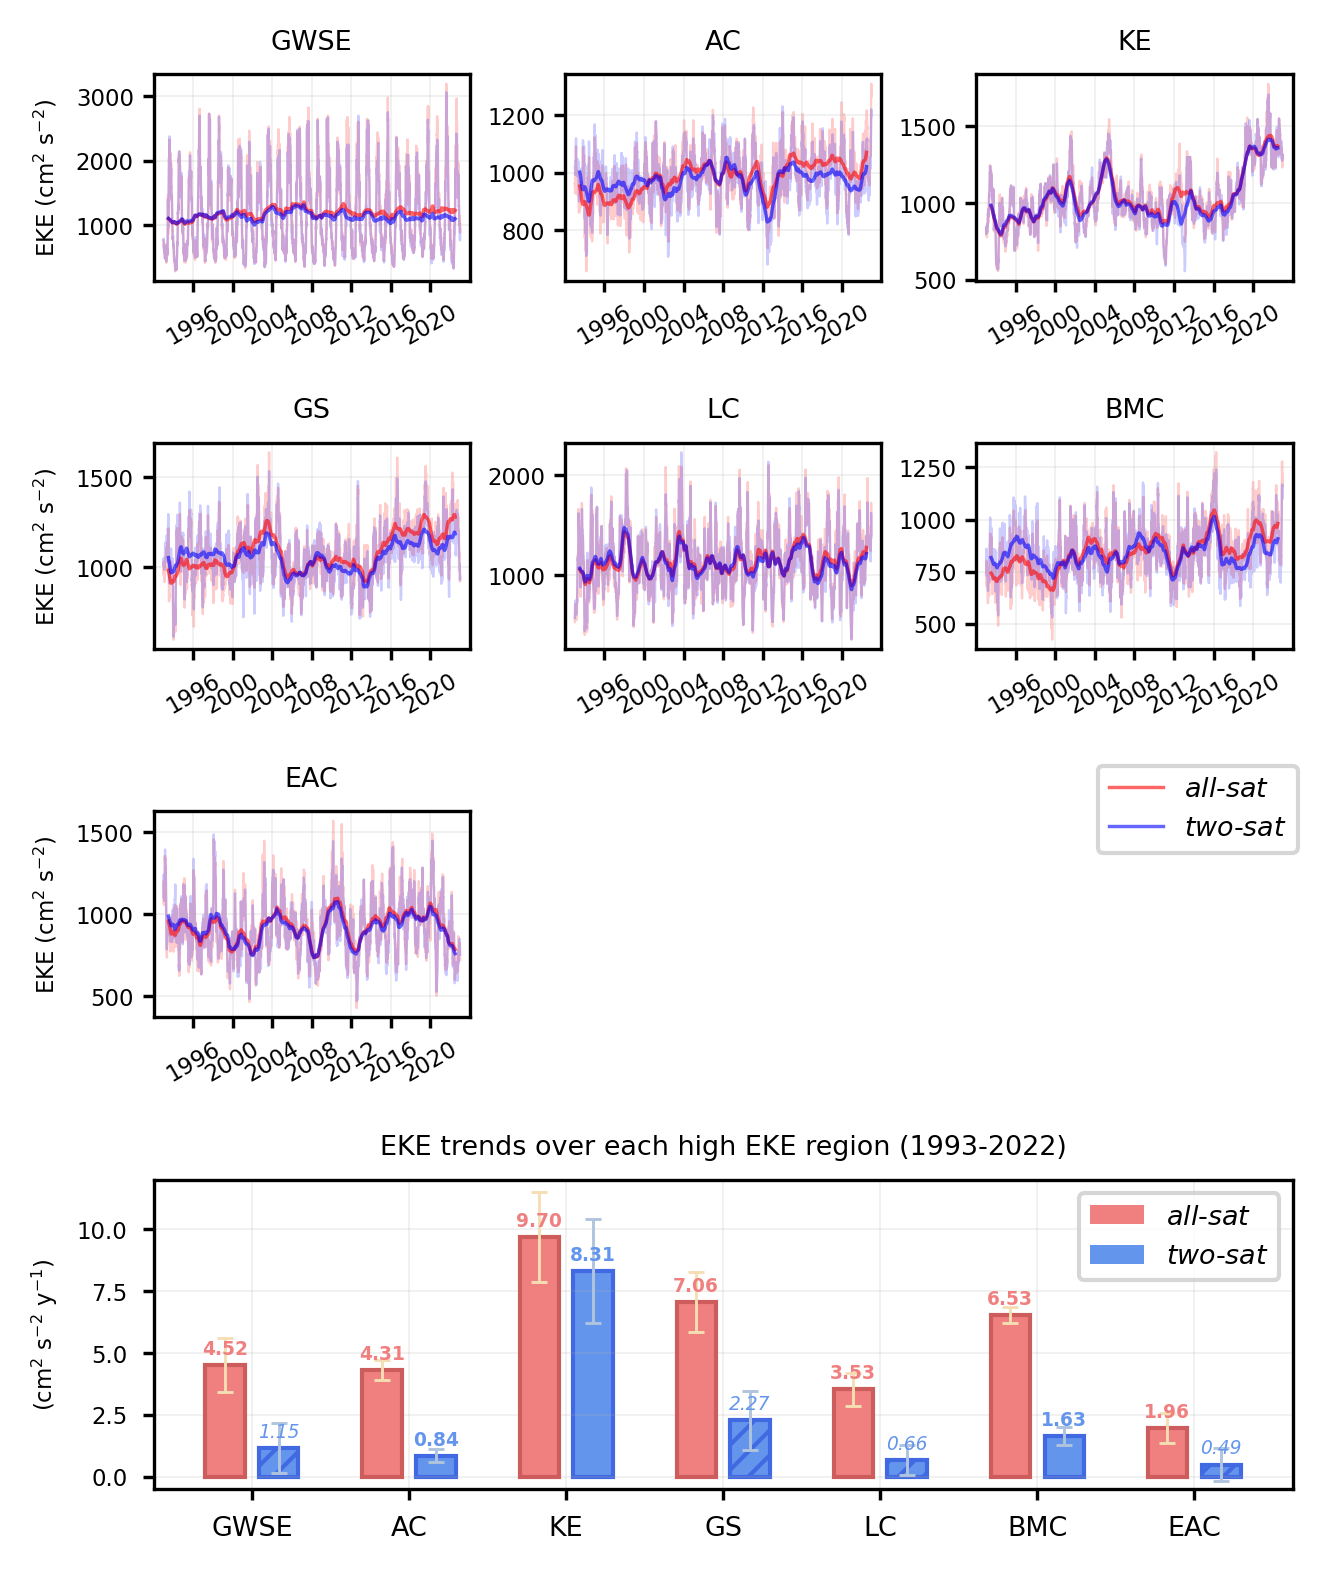

In [14]:
    fs = np.sqrt(fig_size)

    fig = plt.figure(figsize=(np.sqrt(ratio*fig_size),
                              np.sqrt(fig_size/ratio)),
                     dpi=300)

    num_rows = 4
    num_cols = 3
    gs = mpl.gridspec.GridSpec(num_rows, num_cols, height_ratios = [1,1,1,1.5], figure=fig)
    ax = [[None]*num_cols for _ in range(num_rows)]

    fig.subplots_adjust(hspace=0.7, wspace=0.3) 

    k = 0
    for i in range(num_rows-1):
        for j in range(num_cols):
            
            if i == num_rows-2 and j == 1 :
                continue  # Skip this iteration

            if i == num_rows-2 and j == 2 :
                continue  # Skip this iteration 
                
            ax[i][j] = fig.add_subplot(gs[i, j])
    
            ax[i][j].grid(which='major', linewidth=fs*0.015)
            ax[i][j].xaxis.set_tick_params(which='minor', bottom=False)
            
            
            ax[i][j].tick_params(axis='both', which='major',
                                labelsize=text_size*fs,
                                size=fs*0.5,
                                width=fs*0.15,
                                pad=2)

            all_ts = tseries['ALL_SAT'][dic_keys[k]]
            #365 day rolling mean 
            all_ts_roll = all_ts.rolling(time=365, center=True).mean()
            all_ts_roll.plot(color='r',
                        alpha=0.6,
                        label='ALL SAT',
                        linewidth=fs*lw,
                        ax=ax[i][j])
            
            all_ts.plot(color='r',
                    alpha=0.2,
                    linewidth=fs*lw*0.7,
                    ax=ax[i][j],
                    zorder=0)


            two_ts = tseries['TWO_SAT'][dic_keys[k]]
            two_ts_roll = two_ts.rolling(time=365, center=True).mean()
            two_ts_roll.plot(color='b',
                        alpha=0.6,
                        label='TWO SAT',
                        linewidth=fs*lw,
                        ax=ax[i][j])            
            two_ts.plot(color='b',
                    alpha=0.2,
                    linewidth=fs*lw*0.7,
                    ax=ax[i][j],
                    zorder=0)          
            

            ax[i][j].set_xlabel('', fontsize=1*text_size*fs)
            if j == 0:
                ax[i][j].set_ylabel(r'EKE (cm$^{{2}}$ s$^{{-2}}$)', fontsize=1*text_size*fs)
            else:
                ax[i][j].set_ylabel('', fontsize=1*text_size*fs)

            start_date = pd.to_datetime('01-01-1992') #pd.to_datetime('01-01-1993')
            end_date   = pd.to_datetime('12-31-2023')#pd.to_datetime('12-31-2021')

            ax[i][j].set_xlim(start_date, end_date)
            
           # Remove the first and last xticks and their labels
            ticks = ax[i][j].get_xticks()
            ax[i][j].set_xticks(ticks[1:-1])  

            # Format the x-tick labels to show only the year
            ax[i][j].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

            # Center xticklabels
            for label in ax[i][j].get_xticklabels():
                label.set_horizontalalignment('center')
            

            ax[i][j].set_title(dic_keys[k], fontsize=text_size*fs+1)
            

            k+=1
    
    red_line = mlines.Line2D([], [], color='red', alpha=0.6,
                            label=r'$\it{all}$-$\it{sat}$', lw=lw*fs)
    blue_line = mlines.Line2D([], [], color='blue', alpha=0.6,
                            label=r'$\it{two}$-$\it{sat}$', lw=lw*fs) 
    l1 = ax[1][2].legend(handles=[red_line, blue_line],
                        loc='upper center', fontsize=text_size*fs+1,
                        bbox_to_anchor=(0.7,-0.5))
    
    """
    Generating bar plot with the trends of each time series
    """
    ax[num_rows-1][0] = fig.add_subplot(gs[num_rows-1, :])
    ax[num_rows-1][0].grid(which='major', linewidth=fs*0.015)
    ax[num_rows-1][0].xaxis.set_tick_params(which='minor', bottom=False)
    ax[num_rows-1][0].tick_params(axis='both', which='major',
                             labelsize=text_size*fs,
                             size=fs*0.5,
                             width=fs*0.15)
    ax[num_rows-1][0].set_xticks(np.arange(len(dic_keys)))
    tick_labels = dic_keys 
    ax[num_rows-1][0].set_xticklabels(tick_labels, size=text_size*fs+1)  
            
    plot_utils.plot_bar(x + ofset, list_slope_all21raw, ax[num_rows-1][0], wdth, 
                    text_size, fs,  hatchs=mask_nonsig_all21raw,  
                        kind='all_sat', yerr=list_se_all21raw, capsize=2, 
                        elinewidth=0.7)
    plot_utils.plot_bar(x - ofset, list_slope_two21raw, ax[num_rows-1][0], wdth, 
                    text_size, fs, hatchs=mask_nonsig_two21raw,  
                        kind='two_sat', yerr=list_se_two21raw, capsize=2, 
                        elinewidth=0.7)

    
    # add also trend with text - all-sat
    for i, num in enumerate(list_slope_all21raw):
        ax[num_rows-1][0].text(x[i] + ofset, 
                num+text_size*fs/20, 
                f'{num:.02f}',
                fontsize=text_size*fs-1, 
                ha='center', va='bottom', color='lightcoral',
                style=text_style_all21raw[i],
                weight='bold' if text_style_all21raw[i] == 'normal' else 'normal')

    # add also trend with text - two-sat
    for i, num in enumerate(list_slope_two21raw):
        ax[num_rows-1][0].text(x[i] - ofset, 
                num+text_size*fs/20, 
                f'{num:.02f}',
                fontsize=text_size*fs-1, 
                ha='center', va='bottom', color='cornflowerblue',
                style=text_style_two21raw[i],
                weight='bold' if text_style_two21raw[i] == 'normal' else 'normal')
        
        
    ax[num_rows-1][0].set_ylabel(label_unit,
                        fontsize=text_size*fs)

    ax[num_rows-1][0].set_title('EKE trends over each high EKE region (1993-2022)',
                        fontsize=text_size*fs+1)    
    ax[num_rows-1][0].set_ylim(-0.5, 12)
    

    # Create legends for bar plots
    colors = ['lightcoral', 'cornflowerblue']
    categories = [r'$\it{all}$-$\it{sat}$', r'$\it{two}$-$\it{sat}$']

    legend_patches = [Patch(facecolor=color, label=category) for
                      color, category in zip(colors, categories)]
    ax[num_rows-1][0].legend(handles=legend_patches, loc='best',
                    fontsize=text_size*fs+1)  
    
    savepath = f'../../figures/Fig_S5_trends_each_high_EKE_region_revision.{extension}'

    dir_path = os.path.dirname(os.path.realpath(savepath))+'/'
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
   
    plt.savefig(savepath, dpi=300, bbox_inches='tight')

